# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [27]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    #except:
       
        #print("City not found. Skipping...")
    except Exception as e: 
        print(e)
        print("City not found, skipping")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port shepstone
Processing Record 2 of Set 1 | kultali
'coord'
City not found, skipping
Processing Record 3 of Set 1 | shanwei
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | verkhnyaya sinyachikha
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | zaporizhia
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | tanout
Processing Record 16 of Set 1 | kaitong
Processing Record 17 of Set 1 | carauari
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | jianguang
Processing Record 21 of Set 1 | kulia village
'coord'
City not found, ski

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port shepstone,-30.7414,30.4550,12.62,68,2,2.38,ZA,1690257759
1,shanwei,22.7820,115.3475,31.59,63,23,2.71,CN,1690257759
2,isafjordur,66.0755,-23.1240,8.70,95,100,3.15,IS,1690257760
3,katsuura,35.1333,140.3000,28.12,75,57,5.02,JP,1690257760
4,tiksi,71.6872,128.8694,5.67,75,96,2.97,RU,1690257760


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port shepstone,-30.7414,30.4550,12.62,68,2,2.38,ZA,1690257759
1,shanwei,22.7820,115.3475,31.59,63,23,2.71,CN,1690257759
2,isafjordur,66.0755,-23.1240,8.70,95,100,3.15,IS,1690257760
3,katsuura,35.1333,140.3000,28.12,75,57,5.02,JP,1690257760
4,tiksi,71.6872,128.8694,5.67,75,96,2.97,RU,1690257760


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

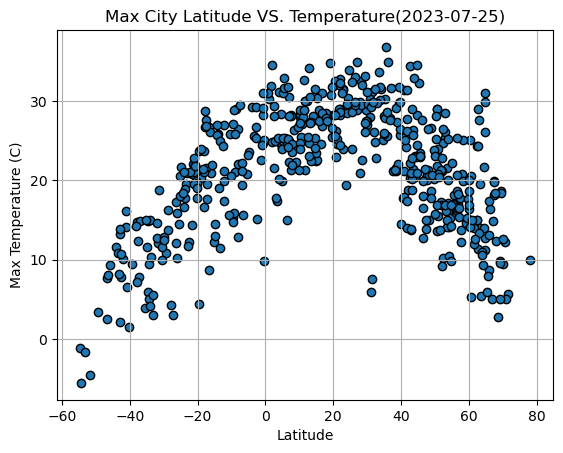

In [34]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y,edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title("Max City Latitude VS. Temperature(2023-07-25)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

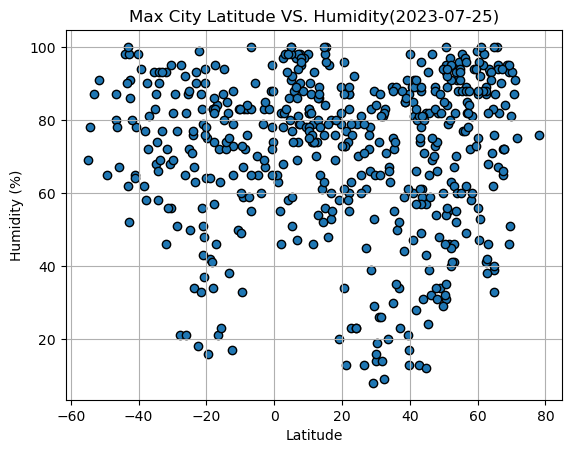

In [35]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y,edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title("Max City Latitude VS. Humidity(2023-07-25)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

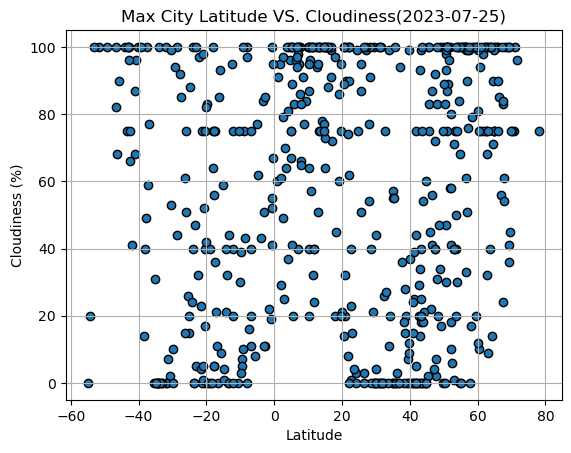

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y,edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title("Max City Latitude VS. Cloudiness(2023-07-25)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

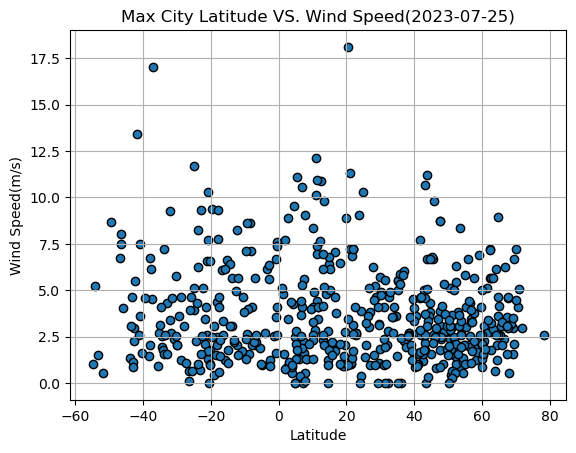

In [38]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y,edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title("Max City Latitude VS. Wind Speed(2023-07-25)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def linear_plot(x,y,xcoord,ycoord):
    plt.scatter(x, y)

    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    slope, intercept, r, p, se = linregress(x, y)
    y_values = slope * x + intercept
    plt.plot(x,y_values,color="r")
    eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(eq, xy =(xcoord,ycoord),color = "r", fontsize = 15)
    print(f"The r-value is: {r**2}")                

    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,shanwei,22.7820,115.3475,31.59,63,23,2.71,CN,1690257759
2,isafjordur,66.0755,-23.1240,8.70,95,100,3.15,IS,1690257760
3,katsuura,35.1333,140.3000,28.12,75,57,5.02,JP,1690257760
4,tiksi,71.6872,128.8694,5.67,75,96,2.97,RU,1690257760
5,iskateley,67.6803,53.1512,18.33,72,61,4.57,RU,1690257765


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port shepstone,-30.7414,30.4550,12.62,68,2,2.38,ZA,1690257759
9,adamstown,-25.0660,-130.1015,20.51,72,15,3.92,PN,1690257494
12,grytviken,-54.2811,-36.5092,-5.57,78,20,5.21,GS,1690257493
15,carauari,-4.8828,-66.8958,23.64,65,62,0.95,BR,1690257535
28,ushuaia,-54.8000,-68.3000,-1.19,69,0,1.03,AR,1690257779


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.38219398278788397


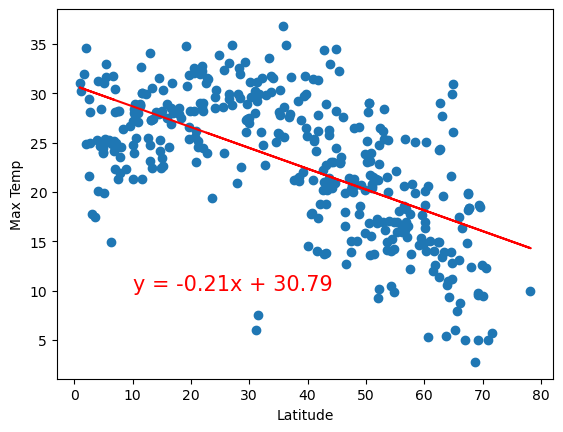

In [48]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_plot(x,y,10,10)


The r-value is: 0.5878062289312611


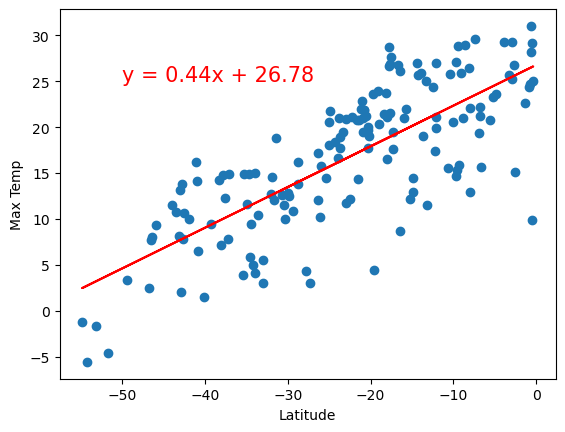

In [50]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_plot(x,y,-50,25)

**Discussion about the linear relationship:** Temperature have linear relationship with latitude and medium  level of corelation. The southern hemisphere corelation is higher compare to northern hemiphere depicted by the R value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0002721896606034833


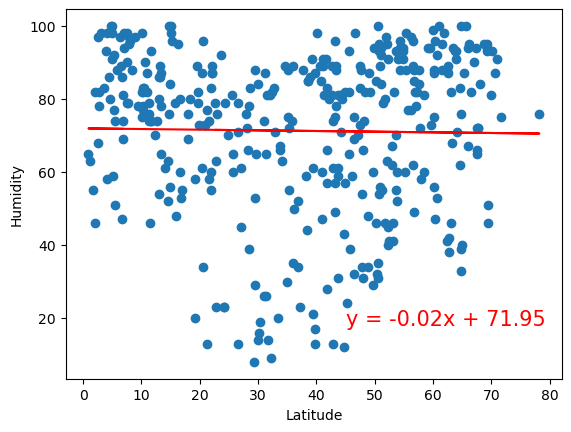

In [53]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_plot(x,y,45,18)

The r-value is: 0.01639320269632309


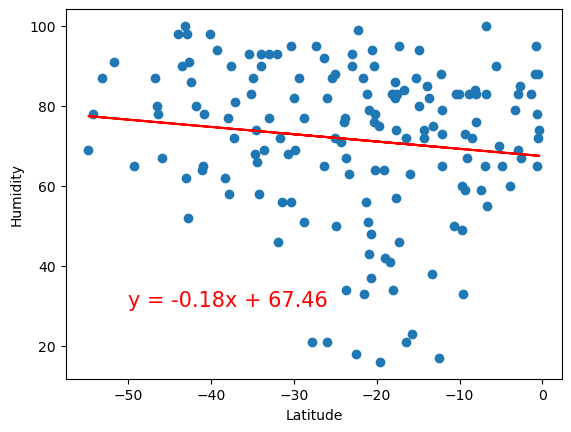

In [56]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_plot(x,y,-50,30)

**Discussion about the linear relationship:** base of the R value for both the northern and southern hemisphere there's no corelation between latitude and humditiy 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0022571199443343834


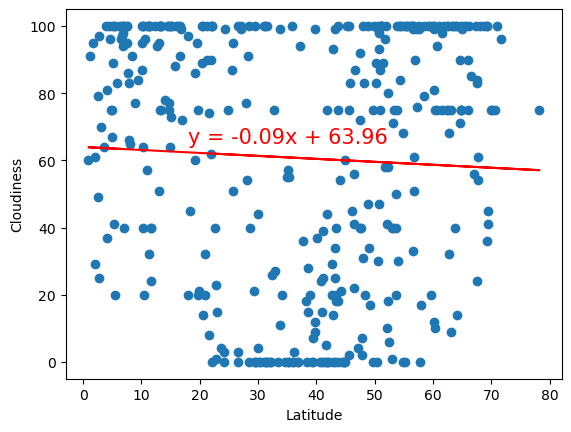

In [59]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_plot(x,y,18,65)

The r-value is: 0.03405746434137021


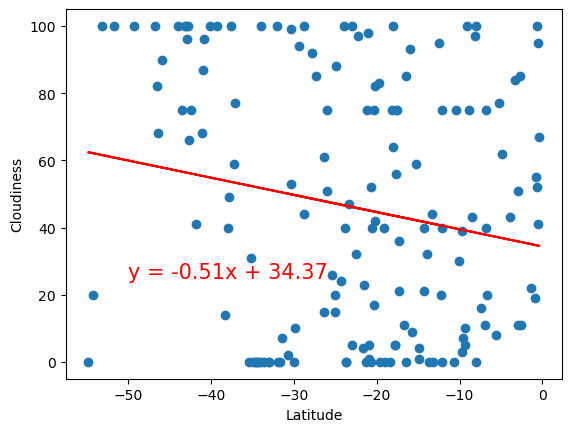

In [61]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_plot(x,y,-50,25)

**Discussion about the linear relationship:** base of the R value for both the northern and southern hemisphere there's no corelation between latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010007638480364466


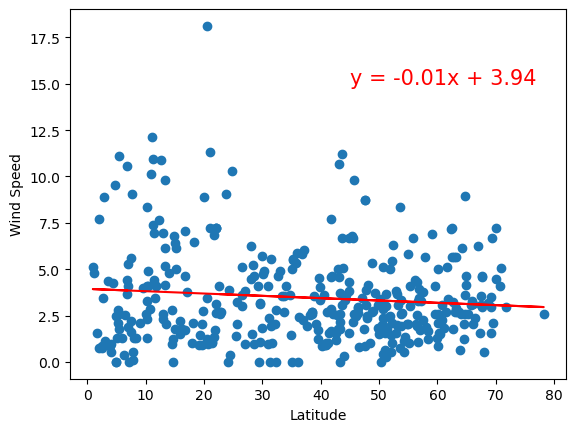

In [63]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_plot(x,y,45,15)

The r-value is: 0.0016360722672135587


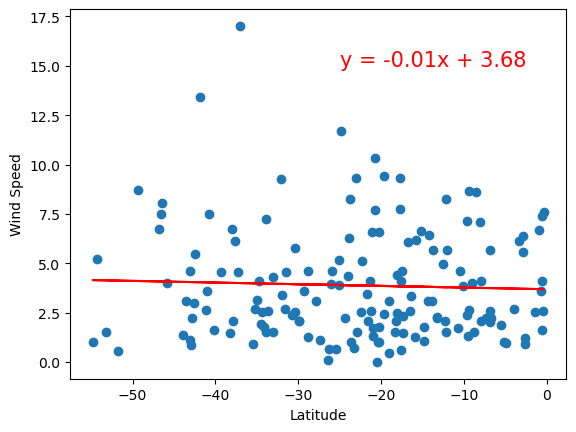

In [66]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_plot(x,y,-25,15)

**Discussion about the linear relationship:** base of the R value for both the northern and southern hemisphere there's no corelation between latitude and Wind Speed.